4. 機械学習の手法

4.1. データセット

In [8]:
#MSE vs サーチケース
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, roc_auc_score, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neural_network import MLPRegressor
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

#reaction length
df = pd.read_excel('/mnt/c/CEA/all_mixtureexp15.xlsx')

l1=['Fuel','Diluent','Equivalentratio','CoefficientDiluent','Oxidizer','diluentratio','P0','H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'a0[m/s]',\
        'pcj[bar]', 'Tcj[K]', 'Hcj[KJ/kg]',\
                    'Mcj[kg/kmol]', 'γcj[-]', 'acj[m/s]',\
                         'Mcj[-]', 'Vcj[m/s]',\
        'Pvn[bar]', 'Tvn[K]', 'Hvn[KJ/kg]',\
                      'γvn[-]','avn[m/s]','theta','Lr','Lc']

XpcaFLRDED = pd.DataFrame({'P0':df['P0']})

for i in range(len(l1)):
    XpcaFLRDED[l1[i]]=df[l1[i]]

XpcaFLRDED =  XpcaFLRDED[~( XpcaFLRDED['Fuel'] == 'C2H2') | ~( XpcaFLRDED['Diluent'] == 'Ar') | ~( XpcaFLRDED['Lc'] ==  5)]
XpcaFLRDED =  XpcaFLRDED[~( XpcaFLRDED['Fuel'] == 'C2H2') | ~( XpcaFLRDED['Diluent'] == 'Ar') | ~( XpcaFLRDED['Lc'] ==  10)]
XpcaFLRDED =  XpcaFLRDED[~( XpcaFLRDED['Diluent'] == 'Kr')]

dfC2H2Hetrain = XpcaFLRDED[~( XpcaFLRDED['Fuel'] == 'C2H2') | ~( XpcaFLRDED['Diluent'] == 'He')]
dfC2H2Hetest = XpcaFLRDED[( XpcaFLRDED['Fuel'] == 'C2H2') & ( XpcaFLRDED['Diluent'] == 'He')]

dfC3H6O2train = dfC2H2Hetrain[~( dfC2H2Hetrain['Fuel'] == 'C3H6') | ~( dfC2H2Hetrain['Oxidizer'] == 'O2')]
dfC3H6O2test = dfC2H2Hetrain[( dfC2H2Hetrain['Fuel'] == 'C3H6') & ( dfC2H2Hetrain['Oxidizer'] == 'O2')]

dftrainval = dfC3H6O2train.sample(frac=1)

X_trainval = dftrainval.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])
XC2H2Hetest = dfC2H2Hetest.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])
XC3H6O2test  = dfC3H6O2test.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio'])

y_trainval = dftrainval['Lr']
yC2H2Hetest = dfC2H2Hetest['Lr']
yC3H6O2test = dfC3H6O2test['Lr']


Index(['P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta'],
      dtype='object')
12


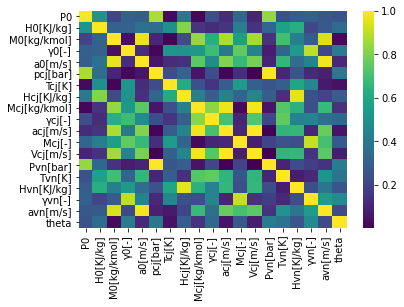

In [9]:
#4.1.　特徴量の削減

threshold = 0.9

feat_corr = set()
corr_matrix = X_trainval.corr()
corr_matrix.to_excel('/mnt/c/CEA/matrix1.xlsx')
corr_matrix = corr_matrix.abs()
corr_matrix.to_excel('/mnt/c/CEA/matrix2.xlsx')
plt.figure()
sns.heatmap(corr_matrix,cmap='viridis')
#plt.tight_layout()
plt.savefig('gurafu5.png')

for i in range(len(corr_matrix.columns)):
    z=0
    corr_matrix.iloc[i, i]=0
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            feat_name1 = corr_matrix.columns[i]
            feat_name2 = corr_matrix.columns[j]
            corr_matrix.iloc[i, j]=0
            corr_matrix.iloc[j,i]=0
            corr_matrix.iloc[i, z]=feat_name2
            feat_corr.add(feat_name1)
            z=z+1

        else:
            corr_matrix.iloc[i, j]=0
            corr_matrix.iloc[j,i]=0
        
X_trainval.drop(labels=feat_corr, axis='columns', inplace=True)
print(X_trainval.columns)
print(len(X_trainval.columns))

corr_matrix.to_excel('/mnt/c/CEA/matrix3.xlsx')

ss = StandardScaler()
sX_train = ss.fit_transform(X_train)
sX_train = pd.DataFrame(sX_train,columns=X_train.columns)

5. ANN回帰

In [10]:
sol = ['adam']
act = ['relu']
hidd = []

for i in [4]:
    for j in [200]:
        b=[j]*i
        b=tuple(b)
        hidd.append(b)

alp=[1e-4]
param_grid = {'solver':sol,'activation':act,'hidden_layer_sizes':hidd,'alpha':alp}
grid1=GridSearchCV(MLPRegressor(), param_grid ,cv=2, n_jobs=4)
grid1.fit(sX_train,y_train)

print('Best parameters: {}'.format(grid1.best_params_))
print('Best cross-validation: {}'.format(grid1.best_score_))

NameError: name 'sX_train' is not defined